In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pysr1/BurlingtonHousingArticle-/master/BurlingtonHousing.csv'
df = pd.read_csv(url, error_bad_lines=False)
import pandas as pd   # tabular data
import numpy as np   # linear algebra, matrix operations, vectorized statistical functions
import matplotlib.pyplot as plt   # scientific plotting
import seaborn as sns   # statistical plots
import warnings   # to turn off annoying warnings
import scipy.stats as stats   # for the spearman correlation function
warnings.simplefilter(action='ignore', category=FutureWarning)  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
# to filter out some stupid warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# https://towardsdatascience.com/supervised-machine-learning-workflow-from-eda-to-api-f6a7719ad897



In [ ]:
df_dummies = pd.get_dummies(df)
init_frame = df_dummies.copy()
X = init_frame.drop('SalePrice', 1)
y = init_frame['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
alphas = np.array([0, 1e-6, 1e-4, 1e-2,0.1, 1, 5, 10, 20, 30, 50, 100,200,300,400,500,750, 1000])


In [ ]:
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('ridge', RidgeCV(cv=10, alphas=alphas))
])

In [ ]:
#fit pipeline to train data
pipe.fit(X_train, y_train)
#extract ridge reg model
rcv = pipe.named_steps['ridge']

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.67162e-17): result may not be accurate.
  overwrite_a=True).T


In [ ]:
rcv.alpha_

200.0

In [ ]:
pipe.score(X_test, y_test)

0.8834401477631565

In [ ]:
def coef_plot(model, X, abs_ = False):
  if abs_ == False:
    coefs = pd.DataFrame({
        'name' : X.columns,
        'coef' : model.coef_}).sort_values('coef')
  else:
    coefs = pd.DataFrame({
        'name' : X.columns,
        'coef' : np.abs(model.coef_)}).sort_values('coef')
  plt.figure(figsize=(16,10))
  sns.pointplot(y='name',
                x='coef',
                data=coefs,
                ci=None,
                color='C0',
                alpha=0.2)
  sns.barplot(y='name', x='coef', data=coefs, ci=None, color='C0', alpha=0.2)
  plt.title('coefs')
  plt.tight_layout()
    

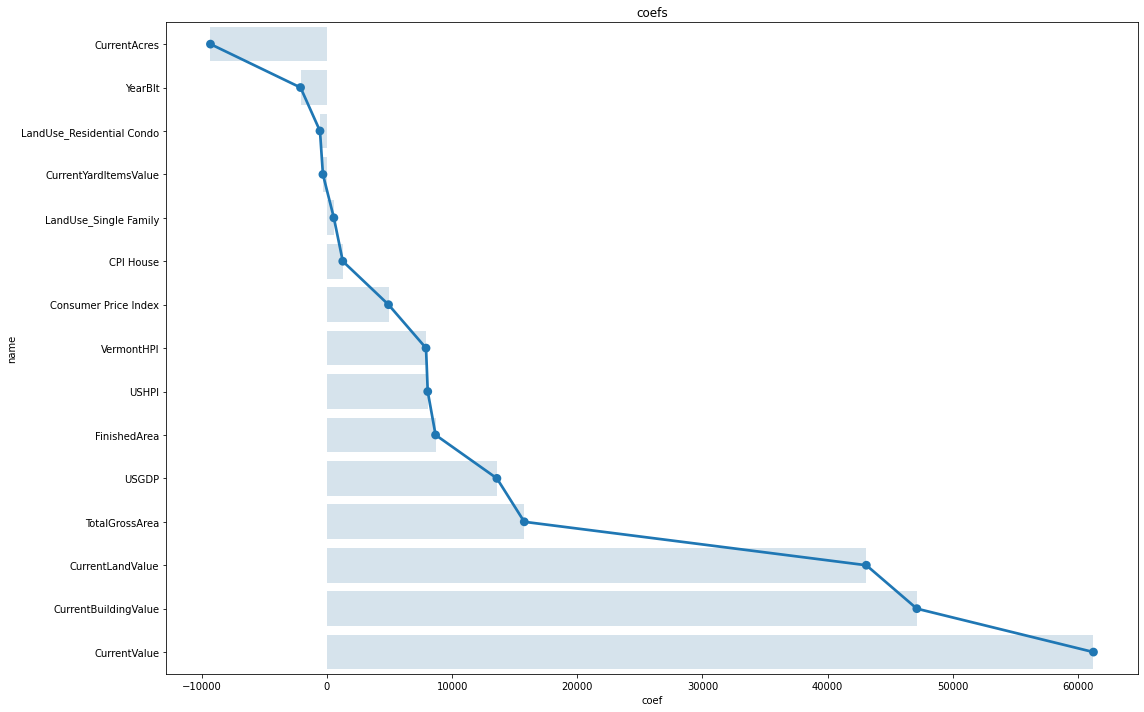

In [ ]:
coef_plot(rcv, X, abs_= False)

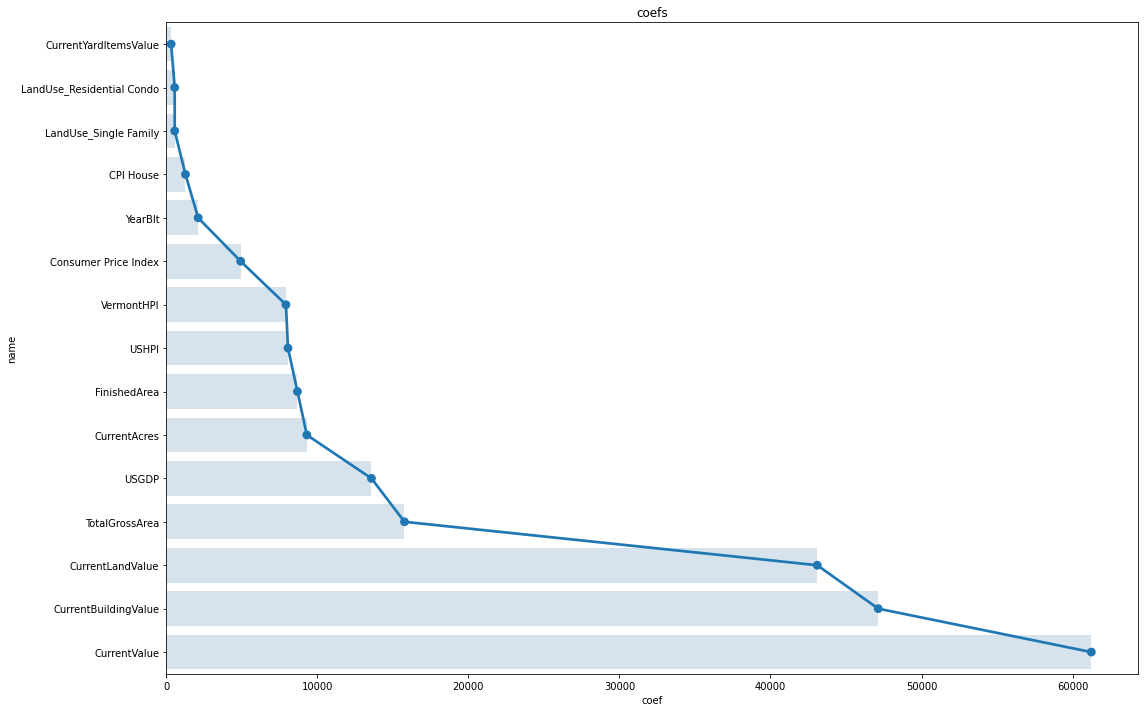

In [ ]:
coef_plot(rcv, X, abs_=True)
